# Predicting Life Expectancy in MSOAs – Building a Linear Regression Model

#### In this project, we will clean the data, conduct some exploratory data analysis and build a linear regression model. 

#### Aims
1. Build a linear regression model to predict life expectancy of MSOAs based on the following predictor variables:
   - Net annual income before household costs
   - Index of Multiple Deprivation (IMD) scores
   - Economic inactivity due to long-term sickness or disability
2. Predict how life expectancy in Dudley will change following a 10% increase in net annual income before household costs.

**Importing the Required Libraries**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing the Life Expectancy Data**

In [2]:
df1 = pd.read_csv('LE_at_birth_2015_to_2019.01.csv')

In [3]:
df1.head()

,Local Health - Office for Health Improvement and Disparities,,.1,.2
0,Geographical references: MSOA 2011 (Middle lev...,,,
1,Code,Label,Life expectancy at birth for males,Life expectancy at birth for females
2,E02000001,City of London 001,91.1,90.2
3,E02000002,Barking and Dagenham 001,79.5,82.5
4,E02000003,Barking and Dagenham 002,78.1,84.2


## DATA CLEANING

#### 1. Clean df1

**a) Drop rows 0 and 1, reset the index, drop the index column that is created by reset_index.**

In [4]:
df1 = df1.drop([0,1]).reset_index().drop(['index'], axis=1)

**b) Rename the columns to match the excel income data** - this will make it easier to merge the datasets later.

In [5]:
column_names = ['MSOA code', 'MSOA name', 'Male Life Expectancy', 'Female Life Expectancy']

In [6]:
df1.columns = column_names

In [7]:
df1.head()

,MSOA code,MSOA name,Male Life Expectancy,Female Life Expectancy
0,E02000001,City of London 001,91.1,90.2
1,E02000002,Barking and Dagenham 001,79.5,82.5
2,E02000003,Barking and Dagenham 002,78.1,84.2
3,E02000004,Barking and Dagenham 003,77.6,81.8
4,E02000005,Barking and Dagenham 004,79.2,84.6


#### 2. Import the 'Net annual income before housing costs' Excel worksheet
- I have not imported the first four lines of the worksheet as they do not contain any data. 

In [8]:
net_income_before_housing_costs = pd.read_excel('MSOA_income_estimates.xlsx', sheet_name = 'Net income before housing costs', 
                                                skiprows=4)

In [9]:
net_income_before_housing_costs.head()

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Net annual income before housing costs (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,28800,32200,25700,6500
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,30100,33800,26800,7000
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,31300,35100,27900,7200
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,27600,30900,24600,6300
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,26500,29600,23600,6000


#### 4. Merge the Life Expectancy and Income Dataframes

In [10]:
df2 = pd.merge(df1, net_income_before_housing_costs, on=['MSOA code', 'MSOA name'])

#### 5. Import IMD Scores Data

In [11]:
df_imd = pd.read_csv('imd2019_msoa_level_data.csv')

In [12]:
df_imd.head()

,MSOAC,MSOAHOCLN,LAD19C,LAD19N,REG,LSOACOUNT,POPMID15,IMD19 SCORE,MSOARANK,MSOADECILE,MSOAQUINTILE
0,E02000001,City of London,E09000001,City of London,London,6,6687,14.720484,4198,7,4
1,E02000002,Marks Gate,E09000002,Barking and Dagenham,London,4,7379,34.767560,1060,2,1
2,E02000003,Chadwell Heath East,E09000002,Barking and Dagenham,London,6,10720,25.149726,2200,4,2
3,E02000004,Eastbrookend,E09000002,Barking and Dagenham,London,4,6536,23.560044,2429,4,2
4,E02000005,Becontree Heath,E09000002,Barking and Dagenham,London,5,9243,30.212965,1519,3,2


In [13]:
df_imd_new = df_imd[['MSOAC', 'IMD19 SCORE', 'POPMID15','MSOARANK', 'MSOADECILE', 'MSOAQUINTILE']]
df_imd_new.rename(columns={'MSOAC':'MSOA code', 'IMD19 SCORE': 'IMD SCORE'}, inplace = True)

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_58755/1724207105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imd_new.rename(columns={'MSOAC':'MSOA code', 'IMD19 SCORE': 'IMD SCORE'}, inplace = True)


#### 6. Merge IMD Data with df2

In [14]:
df3 = pd.merge(df2, df_imd_new, on=['MSOA code'])

In [15]:
df3.head()

,MSOA code,MSOA name,Male Life Expectancy,Female Life Expectancy,Local authority code,Local authority name,Region code,Region name,Net annual income before housing costs (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),IMD SCORE,POPMID15,MSOARANK,MSOADECILE,MSOAQUINTILE
0,E02000001,City of London 001,91.1,90.2,E09000001,City of London,E12000007,London,65000,75100,56300,18800,14.720484,6687,4198,7,4
1,E02000002,Barking and Dagenham 001,79.5,82.5,E09000002,Barking and Dagenham,E12000007,London,28600,32100,25500,6600,34.767560,7379,1060,2,1
2,E02000003,Barking and Dagenham 002,78.1,84.2,E09000002,Barking and Dagenham,E12000007,London,33000,36900,29600,7300,25.149726,10720,2200,4,2
3,E02000004,Barking and Dagenham 003,77.6,81.8,E09000002,Barking and Dagenham,E12000007,London,34300,38300,30600,7700,23.560044,6536,2429,4,2
4,E02000005,Barking and Dagenham 004,79.2,84.6,E09000002,Barking and Dagenham,E12000007,London,30000,33600,26700,6900,30.212965,9243,1519,3,2


#### 7. Import NOMIS Employment Data

In [16]:
df_nomis = pd.read_csv('nomis.csv')

In [17]:
df_nomis.head()

,date,geography,geography code,Economic Activity: All usual residents aged 16 to 74; measures: Value,Economic Activity: Economically active; measures: Value,Economic Activity: Economically active: In employment; measures: Value,Economic Activity: Economically active: Employee: Part-time; measures: Value,Economic Activity: Economically active: Employee: Full-time; measures: Value,Economic Activity: Economically active: Self-employed; measures: Value,Economic Activity: Economically active: Unemployed; measures: Value,...,Economic Activity: Economically Inactive; measures: Value,Economic Activity: Economically inactive: Retired; measures: Value,Economic Activity: Economically inactive: Student (including full-time students); measures: Value,Economic Activity: Economically inactive: Looking after home or family; measures: Value,Economic Activity: Economically inactive: Long-term sick or disabled; measures: Value,Economic Activity: Economically inactive: Other; measures: Value,Economic Activity: Unemployed: Age 16 to 24; measures: Value,Economic Activity: Unemployed: Age 50 to 74; measures: Value,Economic Activity: Unemployed: Never worked; measures: Value,Economic Activity: Long-term unemployed; measures: Value
0,2011,Darlington 001,E02002559,6521,4928,4609,927,2888,794,165,...,1593,967,211,209,133,73,40,43,16,66
1,2011,Darlington 002,E02002560,4462,3323,3006,731,1957,318,181,...,1139,701,141,137,119,41,44,33,21,68
2,2011,Darlington 003,E02002561,4342,3093,2816,706,1856,254,171,...,1249,796,143,120,151,39,32,47,14,61
3,2011,Darlington 004,E02002562,4473,3139,2672,726,1722,224,331,...,1334,623,138,188,275,110,91,62,44,168
4,2011,Darlington 005,E02002563,3912,2620,2366,640,1507,219,168,...,1292,711,130,152,230,69,56,36,26,64


**a) Rename df_nomis column names to match df3, shorten df_nomis**

In [18]:
df_nomis_changed = df_nomis.rename(columns={
    'geography': 'MSOA name',
    'geography code': 'MSOA code',
    'Economic Activity: Economically inactive: Long-term sick or disabled; measures: Value':
    'Economically inactive: Long-term sick or disabled'
})

In [19]:
df_nomis_shortened = df_nomis_changed[['MSOA name', 'MSOA code','Economically inactive: Long-term sick or disabled']]

In [20]:
df_nomis_shortened

,MSOA name,MSOA code,Economically inactive: Long-term sick or disabled
0,Darlington 001,E02002559,133
1,Darlington 002,E02002560,119
2,Darlington 003,E02002561,151
3,Darlington 004,E02002562,275
4,Darlington 005,E02002563,230
...,...,...,...
7196,Newport 016,W02000362,173
7197,Newport 017,W02000363,244
7198,Newport 018,W02000364,476
7199,Newport 019,W02000365,418


#### 8. Merge df_nomis_shortened with df3

In [21]:
df4 = pd.merge(df3, df_nomis_shortened, on=['MSOA code', 'MSOA name'])

In [22]:
df4.head()

,MSOA code,MSOA name,Male Life Expectancy,Female Life Expectancy,Local authority code,Local authority name,Region code,Region name,Net annual income before housing costs (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),IMD SCORE,POPMID15,MSOARANK,MSOADECILE,MSOAQUINTILE,Economically inactive: Long-term sick or disabled
0,E02000001,City of London 001,91.1,90.2,E09000001,City of London,E12000007,London,65000,75100,56300,18800,14.720484,6687,4198,7,4,116
1,E02000002,Barking and Dagenham 001,79.5,82.5,E09000002,Barking and Dagenham,E12000007,London,28600,32100,25500,6600,34.767560,7379,1060,2,1,235
2,E02000003,Barking and Dagenham 002,78.1,84.2,E09000002,Barking and Dagenham,E12000007,London,33000,36900,29600,7300,25.149726,10720,2200,4,2,251
3,E02000004,Barking and Dagenham 003,77.6,81.8,E09000002,Barking and Dagenham,E12000007,London,34300,38300,30600,7700,23.560044,6536,2429,4,2,164
4,E02000005,Barking and Dagenham 004,79.2,84.6,E09000002,Barking and Dagenham,E12000007,London,30000,33600,26700,6900,30.212965,9243,1519,3,2,293


#### 9. Add a Column for Average Life Expectancy

As the 'Male Life Expectancy' and 'Female Life Expectancy' columns are objects, I must convert them into floats before I can calculate the average life expectancy.

In [23]:
df4['Average Life Expectancy'] = (df4['Male Life Expectancy'].astype(float) + 
                                     df4['Female Life Expectancy'].astype(float)) / 2

#### 10. Drop Null Values & Filter for Selected Columns

In [24]:
df5 = df4.dropna()

In [25]:
df6 = df5[['MSOA code', 'MSOA name', 'Region name',
       'Net annual income before housing costs (£)',
       'IMD SCORE','Economically inactive: Long-term sick or disabled',
       'Average Life Expectancy']]

#### 11. Drop Duplicates

In [26]:
final_df = df6.drop_duplicates()

In [27]:
final_df.head()

,MSOA code,MSOA name,Region name,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled,Average Life Expectancy
0,E02000001,City of London 001,London,65000,14.720484,116,90.65
1,E02000002,Barking and Dagenham 001,London,28600,34.767560,235,81.00
2,E02000003,Barking and Dagenham 002,London,33000,25.149726,251,81.15
3,E02000004,Barking and Dagenham 003,London,34300,23.560044,164,79.70
4,E02000005,Barking and Dagenham 004,London,30000,30.212965,293,81.90


## EXPLORATORY DATA ANALYSIS

#### 1. Summary Statistics

In [28]:
final_df.describe().round(1)

,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled,Average Life Expectancy
count,6725.0,6725.0,6725.0,6725.0
mean,32794.1,21.5,231.6,81.6
std,5822.8,13.2,137.6,2.7
min,16700.0,2.2,14.0,69.4
25%,28900.0,11.4,128.0,79.8
50%,32200.0,18.1,199.0,81.8
75%,36000.0,28.6,302.0,83.5
max,67000.0,86.9,1080.0,93.0


#### 2. Distribution of Average Life Expectancy

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_58755/2088677457.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Average Life Expectancy'])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Life Expectancy')

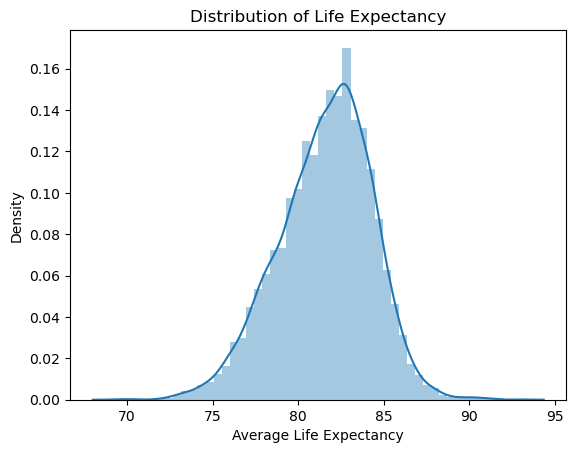

In [29]:
sns.distplot(final_df['Average Life Expectancy'])   
plt.title('Distribution of Life Expectancy')

#### 3. Distribution of IMD scores per Region

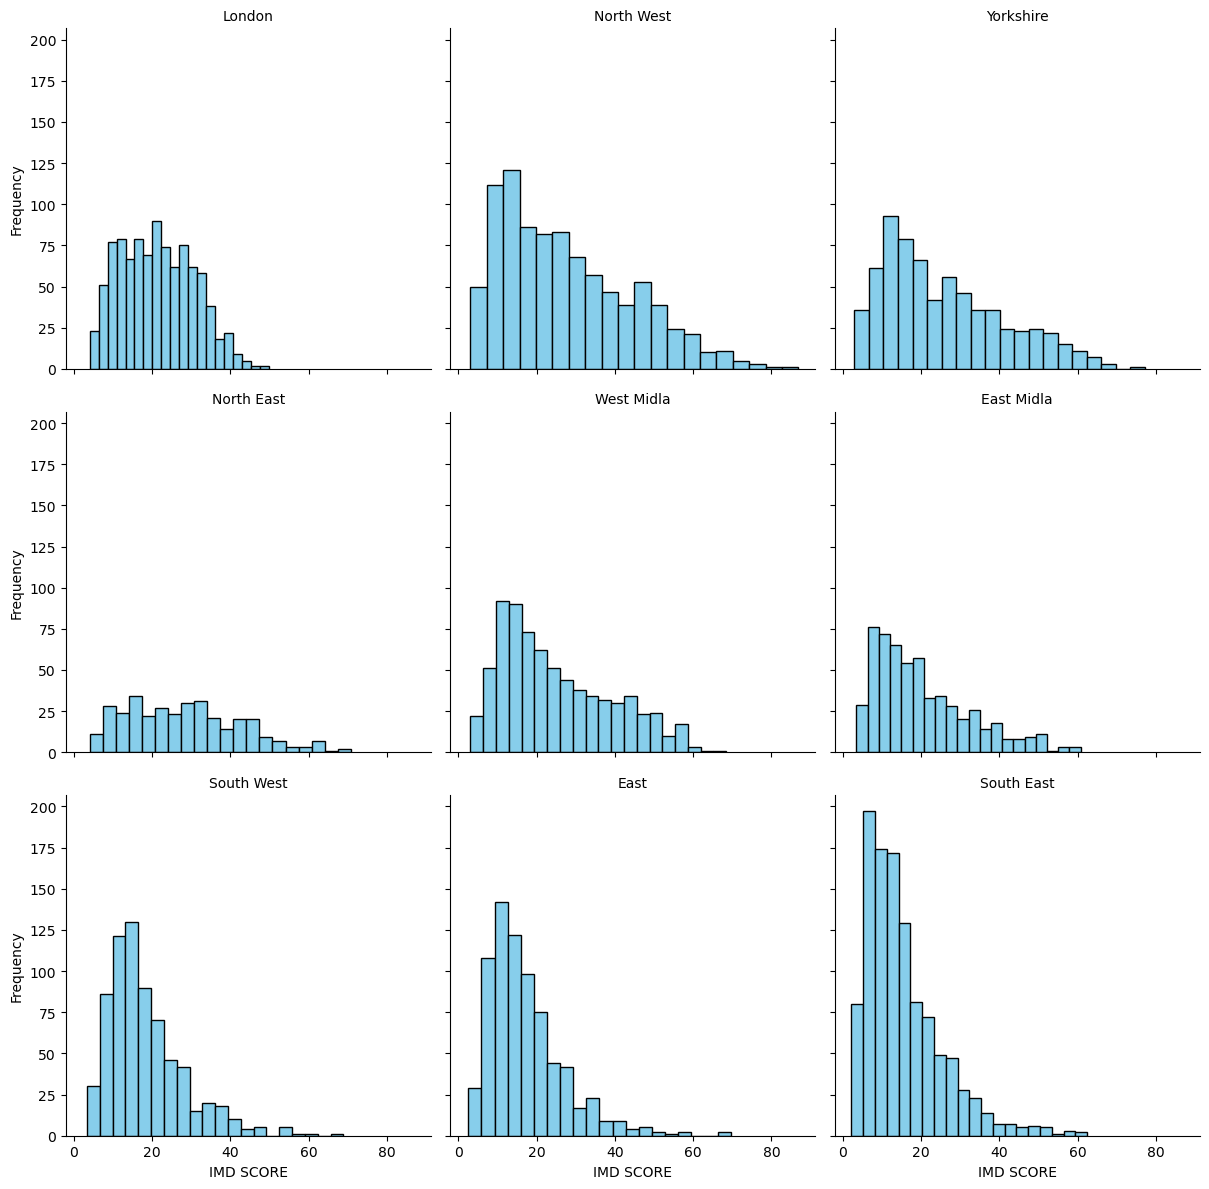

<Figure size 640x480 with 0 Axes>

In [30]:
z = sns.FacetGrid(final_df, col='Region name', col_wrap=3, height=4)
z.map(plt.hist, 'IMD SCORE', bins=20, edgecolor='black', color='skyblue')
z.set_titles('{col_name}')
z.set_axis_labels('IMD SCORE', 'Frequency')
plt.show()

plt.subplots_adjust(hspace=0.5)  # Increase vertical space between plots????

#### 4. Scatter Plots Showing The Relationship Between The Predictor Variables and Life Expectancy

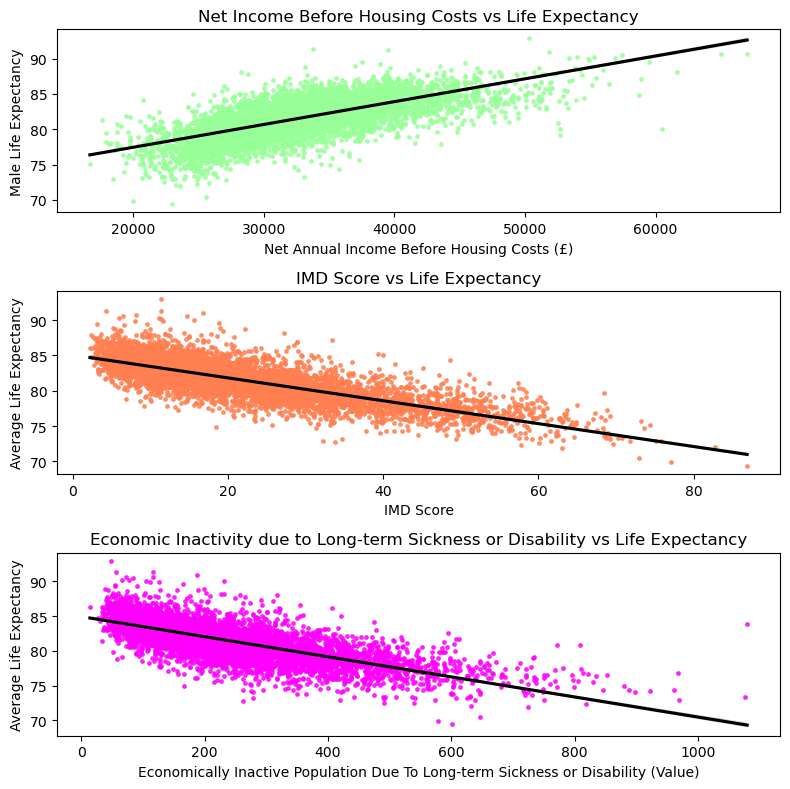

In [57]:
fig,axes = plt.subplots(nrows=3,figsize=(8,8))

# Net annual income before housing costs
sns.regplot(x='Net annual income before housing costs (£)', y='Average Life Expectancy',
            data=final_df, ax=axes[0], scatter_kws={'color': '#98FF98', 's': 6}, line_kws={'color': 'black'})
axes[0].set_xlabel('Net Annual Income Before Housing Costs (£)')
axes[0].set_ylabel('Male Life Expectancy')
axes[0].set_title('Net Income Before Housing Costs vs Life Expectancy',fontsize=12)

#IMD score
sns.regplot(x='IMD SCORE', y='Average Life Expectancy',
            data=final_df, ax=axes[1], scatter_kws={'color': '#FF7F50','s': 6}, line_kws={'color': 'black'})
axes[1].set_xlabel('IMD Score')
axes[1].set_ylabel('Average Life Expectancy')
axes[1].set_title('IMD Score vs Life Expectancy',fontsize=12)

#'Economically inactive: Long-term sick or disabled'
sns.regplot(x='Economically inactive: Long-term sick or disabled', y='Average Life Expectancy',
            data=final_df, ax=axes[2], scatter_kws={'color': 'magenta','s': 6}, line_kws={'color': 'black'})
axes[2].set_xlabel('Economically Inactive Population Due To Long-term Sickness or Disability (Value)')
axes[2].set_ylabel('Average Life Expectancy')
axes[2].set_title('Economic Inactivity due to Long-term Sickness or Disability vs Life Expectancy',fontsize=12)

plt.tight_layout()

#### 5. Box Plots to Show Net Annual Income Before Housing Costs Per Region

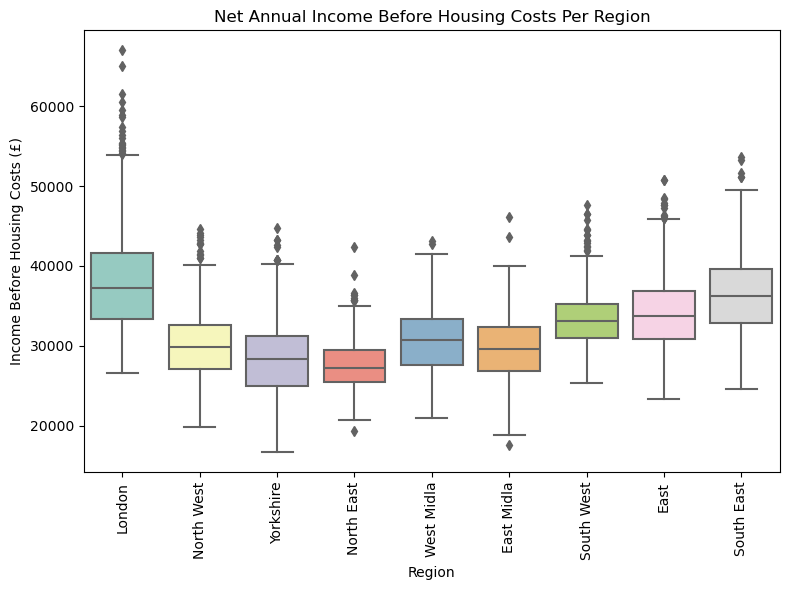

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region name', y='Net annual income before housing costs (£)', data=final_df, palette='Set3')

plt.title('Net Annual Income Before Housing Costs Per Region')
plt.xlabel('Region')
plt.ylabel('Income Before Housing Costs (£)')
plt.xticks(rotation=90)  

plt.tight_layout()

### PHASE 1 - Building a Linear Regression Model

#### 1. Split the Data

 We need to split the data into an:
   - X array (which contains the features to train on, the predictor variables) &
   - y-array (which contains the target variable, in this case the life expectancy which we are trying to predict). 

In [33]:
X = final_df[['Net annual income before housing costs (£)', 'IMD SCORE',
              'Economically inactive: Long-term sick or disabled']]
y = final_df['Average Life Expectancy']

#### 2. Do a Train, Test Split
   - We want to split the data into a training set for the model and a testing set in order to test the model once it has been trained.
   - To do this, we need skicit learn (specifically the train_test_split function)

**a) Import train_test_split**

In [34]:
from sklearn.model_selection import train_test_split

**b) Set test_size to 0.4**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### 3. Create and Train the Model

**a) Import the linear regression module** 

In [36]:
from sklearn.linear_model import LinearRegression

**b) Make an instance of the linear regression model**

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

#### 4. Evaluate Model Using Regression Coefficients

In [39]:
print(model.intercept_)

80.15868731741597


In [40]:
coefficients = model.coef_    
coefficients

array([ 0.00012859, -0.08745336, -0.00397686])

In [41]:
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Net annual income before housing costs (£),0.000129
IMD SCORE,-0.087453
Economically inactive: Long-term sick or disabled,-0.003977


#### 4. Predictions

**a) Make the Predictions**

In [42]:
predictions = model.predict(X_test)
predictions  

array([84.04824217, 83.11822608, 84.03945734, ..., 78.62052733,
       85.19268571, 83.57297581])

**b) Scatter Plot to show Predictions vs Actual Values**

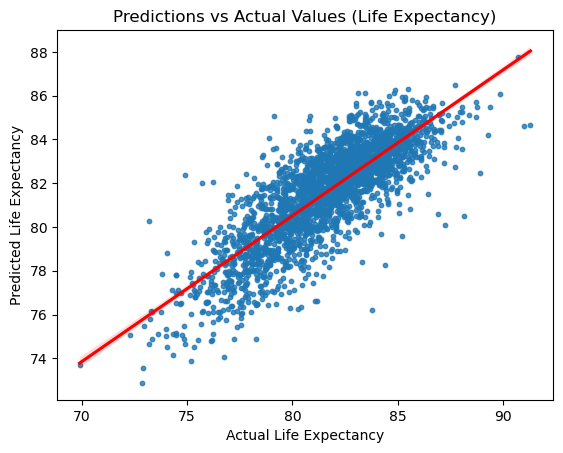

In [43]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Predictions vs Actual Values (Life Expectancy)')
plt.show()

**c) Histogram of Residuals**

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_58755/4009002029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Residuals')

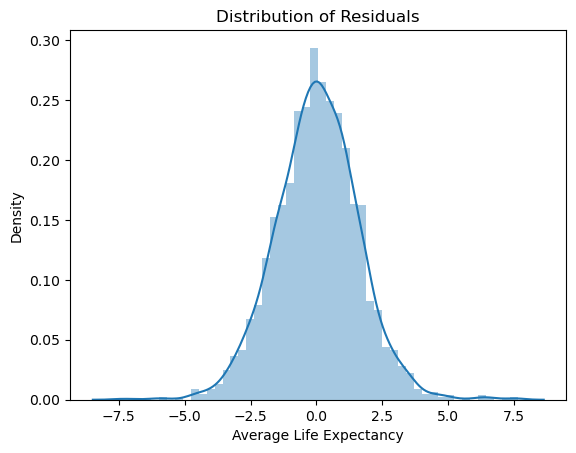

In [44]:
sns.distplot((y_test-predictions))
plt.title('Distribution of Residuals')

**Insights:** The residuals are normally distributed which shows the model is suitable for this data.

#### 4. Evaluate the Model using R-Squared

In [45]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

R-squared: 0.6581019799364336


#### 5. Find The Most Significant Variable

To identify the most significant variable, we will refit the linear regression model multiple times, each time excluding one of the three variables. For each model, we will calculate the R-squared value.

In [46]:
X1 = final_df[['IMD SCORE','Economically inactive: Long-term sick or disabled']]
X2 = final_df[['Net annual income before housing costs (£)','Economically inactive: Long-term sick or disabled']]
X3 = final_df[['Net annual income before housing costs (£)', 'IMD SCORE']]
y1 = final_df['Average Life Expectancy']

In [47]:
def find_r_squared(X_data,y_data):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r_squared = r2_score(y_test, predictions)
    return r_squared

In [48]:
r_squared_values = [find_r_squared(X1, y1), find_r_squared(X2, y1), find_r_squared(X3, y1)]
r_squared_values

[0.6204122072618886, 0.618073976004546, 0.6481756284508083]

In [49]:
r_squared_df = pd.DataFrame({'Variable Removed From Model': X.columns,'R-Squared Values': r_squared_values})
r_squared_df

,Variable Removed From Model,R-Squared Values
0,Net annual income before housing costs (£),0.620412
1,IMD SCORE,0.618074
2,Economically inactive: Long-term sick or disabled,0.648176


**Analysis:** The model with 'IMD score' removed has the lowest r-squared value. 

### PHASE 2 - Dudley

#### 1. Filter final_df for MSOAs in Dudley

In [50]:
def get_dudley_places(df):
    dudley_places = df[df['MSOA name'].str.startswith('Dudley')]
    return dudley_places

In [51]:
dudley_df = get_dudley_places(final_df)
dudley_df.head()

,MSOA code,MSOA name,Region name,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled,Average Life Expectancy
1943,E02002000,Dudley 001,West Midla,27000,31.799350,292,79.95
1944,E02002001,Dudley 002,West Midla,28200,25.197642,200,81.50
1945,E02002002,Dudley 003,West Midla,32600,8.157939,127,83.65
1946,E02002003,Dudley 004,West Midla,28400,22.168486,271,80.60
1947,E02002004,Dudley 005,West Midla,27000,33.848990,330,79.70


#### 2. Filter dudley_df For Desired Columns

In [52]:
mini_dudley_df = dudley_df[['Net annual income before housing costs (£)', 'IMD SCORE', 
                            'Economically inactive: Long-term sick or disabled']]
mini_dudley_df.head()

,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled
1943,27000,31.799350,292
1944,28200,25.197642,200
1945,32600,8.157939,127
1946,28400,22.168486,271
1947,27000,33.848990,330


#### 3. Multiply 'Net annual income before housing costs (£)' Column By 1.1 (to show the 10% increase in income)

In [53]:
mini_dudley_df['Net annual income before housing costs (£)'] = mini_dudley_df['Net annual income before housing costs (£)']*1.1

/var/folders/0g/9c2sx5tj5nzfjm5nd2m6t3_m0000gn/T/ipykernel_58755/2756336375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_dudley_df['Net annual income before housing costs (£)'] = mini_dudley_df['Net annual income before housing costs (£)']*1.1


In [54]:
mini_dudley_df.head()

,Net annual income before housing costs (£),IMD SCORE,Economically inactive: Long-term sick or disabled
1943,29700.0,31.799350,292
1944,31020.0,25.197642,200
1945,35860.0,8.157939,127
1946,31240.0,22.168486,271
1947,29700.0,33.848990,330


#### 4. Pass mini_dudley_df Into Model

In [55]:
model.predict(mini_dudley_df)

array([80.03566569, 81.14861953, 83.55149452, 81.15946275, 79.70529713,
       77.91577121, 80.58970559, 81.58194223, 83.32313635, 78.45376876,
       78.75666951, 83.29867738, 78.5679134 , 83.40789558, 79.44081277,
       81.91580597, 78.34911612, 79.71684644, 83.11108192, 79.25358095,
       82.50298393, 78.54948378, 80.25975338, 82.47590124, 80.90159537,
       81.05918405, 82.51803975, 84.20844422, 82.64520322, 83.3743942 ,
       80.85941857, 81.12695078, 80.2117368 , 82.4824403 , 81.42550208,
       83.83951853, 79.29168428, 82.28248154, 80.85300674, 83.14611956,
       84.32223637, 82.80338617, 83.70857634])